# Dependencies

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import tensorflow as tf
import os

# Remove bad images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e: 
            print(f'Issue with image {image_path}')

Image not in ext list data\lemur\01-aye-aye-thumb-nationalgeographic_1160924.jpg
Image not in ext list data\lemur\11573237_700x0.webp
Image not in ext list data\lemur\1200x680_maxmatinnews181478.jpg
Image not in ext list data\lemur\2560px-LC3A9murien_1052a.JPG.jpg
Image not in ext list data\lemur\6710098_700x0.webp
Image not in ext list data\lemur\870x489_lemuriens_-_pierrick_boyer_1.jpg
Image not in ext list data\lemur\depositphotos_12248432-stock-photo-ring-tailed-lemur.jpg
Image not in ext list data\lemur\depositphotos_81382658-stock-photo-lemur-wild-animals.jpg
Image not in ext list data\lemur\Un-bebe-lemurien-ne-a-la-Citadelle_head.jpg
Image not in ext list data\meerkat\860_suricate_1.jpg
Image not in ext list data\meerkat\870x489_suricate_3.jpg
Image not in ext list data\meerkat\depositphotos_43338079-stock-photo-meerkat-looking.jpg
Image not in ext list data\meerkat\Stock-GettyImages-200471527-001_web.adapt_.885.1.jpg
Image not in ext list data\meerkat\suricate5.jpg
Image not in

# Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 163 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

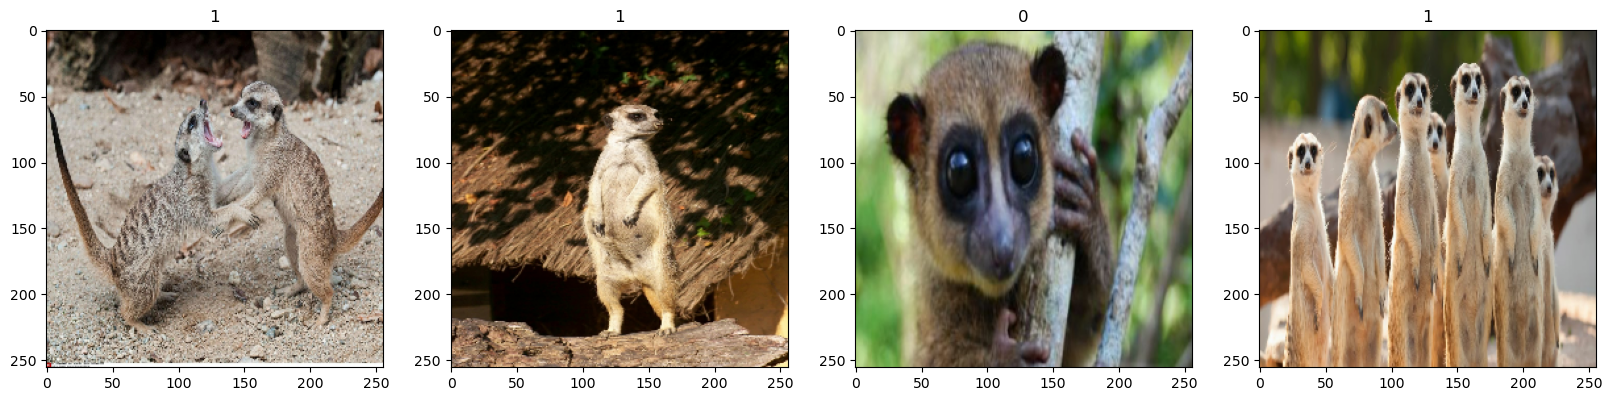

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

# Split Data

In [16]:
len(data)

6

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1)

In [21]:
print( train_size + val_size + test_size)

6


In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
4/4 [==============================] - 12s 1s/step - loss: 1.4909 - accuracy: 0.4453 - val_loss: 1.0966 - val_accuracy: 0.3714
Epoch 2/30
4/4 [==============================] - 4s 407ms/step - loss: 0.8010 - accuracy: 0.5156 - val_loss: 0.6923 - val_accuracy: 0.5143
Epoch 3/30
4/4 [==============================] - 3s 533ms/step - loss: 0.6878 - accuracy: 0.5078 - val_loss: 0.6836 - val_accuracy: 0.5143
Epoch 4/30
4/4 [==============================] - 2s 462ms/step - loss: 0.6831 - accuracy: 0.5000 - val_loss: 0.6643 - val_accuracy: 0.4857
Epoch 5/30
4/4 [==============================] - 2s 486ms/step - loss: 0.6694 - accuracy: 0.5312 - val_loss: 0.6548 - val_accuracy: 0.7143
Epoch 6/30
4/4 [==============================] - 2s 493ms/step - loss: 0.6693 - accuracy: 0.8281 - val_loss: 0.6525 - val_accuracy: 0.5714
Epoch 7/30
4/4 [==============================] - 2s 510ms/step - loss: 0.6640 - accuracy: 0.5078 - val_loss: 0.6235 - val_accuracy: 0.8857
Epoch 8/30
4/4 [======

# Plot Performance

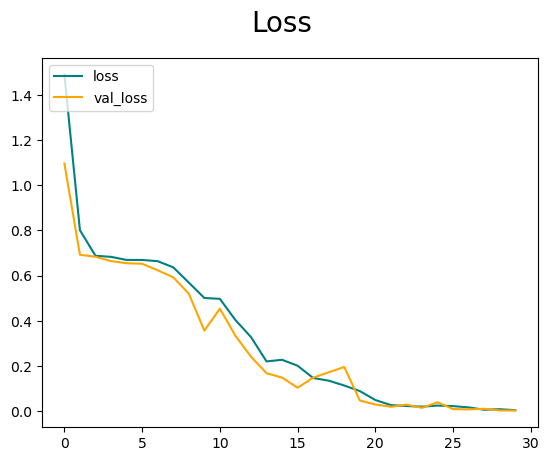

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

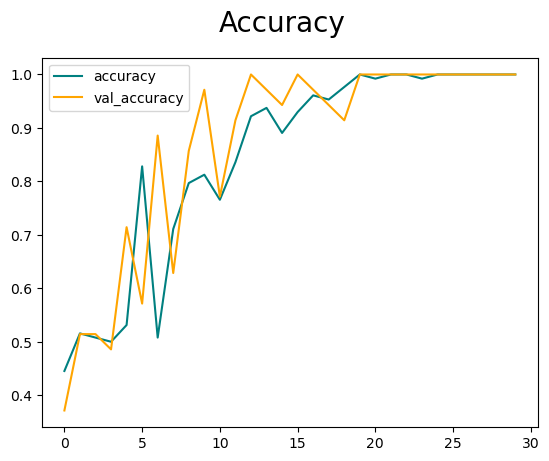

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [36]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.0, Recall: 0.0, Accuracy: 0.0


# Test

In [79]:
import cv2

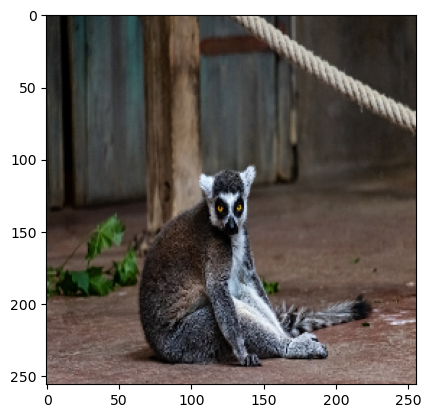

In [54]:
img = cv2.imread(os.path.join('data-test', 'lemur.jpg'))
resize = tf.image.resize(img, (256,256))
plt.imshow(cv2.cvtColor(resize.numpy()/255, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 411ms/step


In [40]:
yhat

array([[0.9979023]], dtype=float32)

In [41]:
if yhat > 0.5: 
    print(f'Predicted class is Lemur')
else:
    print(f'Predicted class is Meerkat')

Predicted class is Lemur


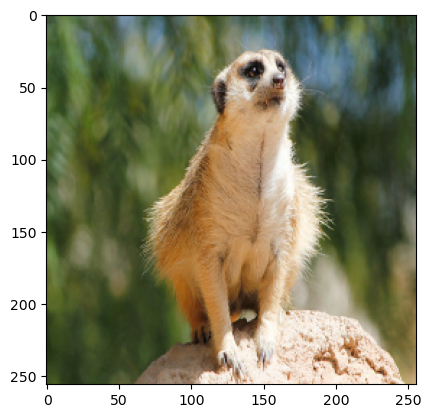

In [55]:
img = cv2.imread(os.path.join('data-test', 'meerkat.jpg'))
resize = tf.image.resize(img, (256,256))
plt.imshow(cv2.cvtColor(resize.numpy()/255, cv2.COLOR_BGR2RGB))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [44]:
yhat

array([[3.3143751e-06]], dtype=float32)

In [45]:
if yhat > 0.5: 
    print(f'Predicted class is Lemur')
else:
    print(f'Predicted class is Meerkat')

Predicted class is Meerkat


# Save the Model

In [46]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('models', 'lemur-meerkat-cnn.h5'))

# Load the Model

In [50]:
new_model = load_model(os.path.join('models', 'lemur-meerkat-cnn.h5'))

In [51]:
img = cv2.imread(os.path.join('data-test', 'lemur.jpg'))
resize = tf.image.resize(img, (256,256))
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


In [52]:
yhat

array([[0.9979023]], dtype=float32)

In [53]:
if yhat > 0.5: 
    print(f'Predicted class is Lemur')
else:
    print(f'Predicted class is Meerkat')

Predicted class is Lemur
